Number of Omega-automaton states (including the trap state): 2


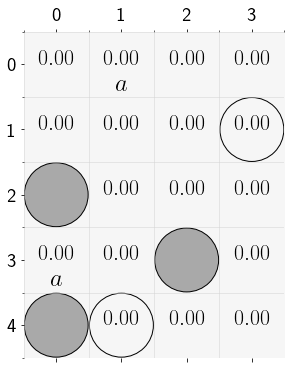

In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np

ltl = 'F G a'
# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)


# MDP Description
shape = (5,4)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'T'],
    ['B',  'E',  'E',  'E'],
    ['E',  'E',  'B',  'E'],
    ['B',  'T',  'E',  'E']
])

label = np.array([
    [(),       ('a',),     (),    ()],
    [(),       (),     (),    ()],
    [(),       (),     (),    ()],
    [('a',),   (),     (),    ()],
    [(),       (),     (),    ()]
],dtype=np.object)

# discount = 0.999999
# discountB = 0.9999
# discountB = 0.99
reward = np.zeros(shape)
# reward[3,0] = 1-discountB

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=6,robust=True)  # Use figsize=4 for smaller figures
grid_mdp.plot()
# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [2]:
oa.__dict__

{'oa_type': 'dra',
 'q0': 0,
 'delta': [{(): 0, ('a',): 0}, {(): 1, ('a',): 1}],
 'acc': [{(): [False], ('a',): [True]}, {(): [None], ('a',): [None]}],
 'shape': (1, 2),
 'spot_oa': None,
 'eps': [[], []]}

In [3]:
value,stats = csrl.shapley(T=2**17)

In [4]:
print(stats[0])

         17039369 function calls in 6.146 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 10485760    3.955    0.000    3.955    0.000 {built-in method builtins.min}
  2621440    1.007    0.000    1.007    0.000 {built-in method builtins.max}
   655361    0.771    0.000    0.771    0.000 {built-in method numpy.empty}
  3276801    0.413    0.000    0.413    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 C:\Users\alper\anaconda3\lib\multiprocessing\shared_memory.py:73(__init__)
        1    0.000    0.000    0.000    0.000 {built-in method _winapi.OpenFileMapping}
        1    0.000    0.000    0.000    0.000 {built-in method _winapi.MapViewOfFile}
        1    0.000    0.000    0.000    0.000 {built-in method _winapi.VirtualQuerySize}
        1    0.000    0.000    0.000    0.000 {built-in method _winapi.CloseHandle}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_l

In [5]:
# np.save('value2',value)
# value = np.load('value2.npy')

In [6]:
csrl.plot(value)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=1), …

In [7]:
policy, policy_ = csrl.get_greedy_policies(value)

In [8]:
csrl.plot(policy=policy,policy_=policy_)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=1), …

Number of Omega-automaton states (including the trap state): 3


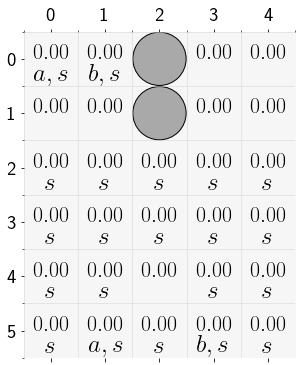

In [9]:
# Specification
ltl = 'F G s & G F a & G F b'
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (6,5)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'B',  'E',  'E'],
    ['E',  'E',  'B',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E']
])

label = np.array([
    [('a','s'), ('b','s'), (),     (),        ()],
    [(),        (),        (),     (),        ()],
    [('s',),    ('s',),    ('s',), ('s',),    ('s',)],
    [('s',),    ('s',),    ('s',), ('s',),    ('s',)],
    [('s',),    ('s',),    (),     ('s',),    ('s',)],
    [('s',),    ('a','s'), ('s',), ('b','s'), ('s',)]
],dtype=np.object)

# discount = 0.999999
# discountB = 0.9999
# discountB = 0.99
reward = np.zeros(shape)
# reward[3,0] = 1-discountB

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=6,robust=True)  # Use figsize=4 for smaller figures
grid_mdp.plot()
# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [10]:
oa.__dict__

{'oa_type': 'dra',
 'q0': 0,
 'delta': [{(): 1,
   ('a',): 1,
   ('b',): 1,
   ('s',): 0,
   ('a', 'b'): 1,
   ('a', 's'): 1,
   ('b', 's'): 0,
   ('a', 'b', 's'): 1},
  {(): 1,
   ('a',): 1,
   ('b',): 1,
   ('s',): 1,
   ('a', 'b'): 1,
   ('a', 's'): 1,
   ('b', 's'): 0,
   ('a', 'b', 's'): 0},
  {(): 2,
   ('a',): 2,
   ('b',): 2,
   ('s',): 2,
   ('a', 'b'): 2,
   ('a', 's'): 2,
   ('b', 's'): 2,
   ('a', 'b', 's'): 2}],
 'acc': [{(): [False],
   ('a',): [False],
   ('b',): [False],
   ('s',): [None],
   ('a', 'b'): [False],
   ('a', 's'): [True],
   ('b', 's'): [None],
   ('a', 'b', 's'): [True]},
  {(): [False],
   ('a',): [False],
   ('b',): [False],
   ('s',): [None],
   ('a', 'b'): [False],
   ('a', 's'): [None],
   ('b', 's'): [None],
   ('a', 'b', 's'): [True]},
  {(): [None],
   ('a',): [None],
   ('b',): [None],
   ('s',): [None],
   ('a', 'b'): [None],
   ('a', 's'): [None],
   ('b', 's'): [None],
   ('a', 'b', 's'): [None]}],
 'shape': (1, 3),
 'spot_oa': None,
 'eps': [

In [11]:
value,stats = csrl.shapley(T=2**20)

In [12]:
policy, policy_ = csrl.get_greedy_policies(value)
csrl.plot(policy=policy,policy_=policy_)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

In [13]:
csrl.plot(value)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

In [14]:
np.save('robust_value.npy',value)